In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from verstack.stratified_continuous_split import scsplit

pd.set_option('display.max_columns', None)

import warnings

warnings.filterwarnings('ignore')

In [2]:
path_get3 = pd.read_csv("PARA_images_mean_score_greaterorequalthan_3_outier_removed.csv")
path_get2 = pd.read_csv("PARA_images_mean_score_greaterorequalthan_2_outier_removed.csv")

In [3]:
path_get3

,imageName,aestheticScore,qualityScore
0,iaa_pub10000_.jpg,3.020833,3.158333
1,iaa_pub10001_.jpg,3.270833,3.520833
2,iaa_pub10002_.jpg,2.875000,2.991667
3,iaa_pub10003_.jpg,3.562500,3.804167
4,iaa_pub10004_.jpg,3.020833,3.237500
...,...,...,...
31215,iaa_pub9998_.jpg,2.979167,3.166667
31216,iaa_pub9999_.jpg,3.416667,3.575000
31217,iaa_pub999_.jpg,2.740000,2.836000
31218,iaa_pub99_.jpg,3.580000,3.780000


In [4]:
path_get2

,imageName,aestheticScore,qualityScore
0,iaa_pub10000_.jpg,3.021739,3.169565
1,iaa_pub10001_.jpg,3.282609,3.547826
2,iaa_pub10002_.jpg,2.869565,2.995652
3,iaa_pub10003_.jpg,3.543478,3.800000
4,iaa_pub10004_.jpg,3.021739,3.252174
...,...,...,...
31215,iaa_pub9998_.jpg,2.978261,3.178261
31216,iaa_pub9999_.jpg,3.391304,3.560870
31217,iaa_pub999_.jpg,2.740000,2.836000
31218,iaa_pub99_.jpg,3.580000,3.780000


array([[<AxesSubplot:title={'center':'aestheticScore'}>,
        <AxesSubplot:title={'center':'qualityScore'}>]], dtype=object)

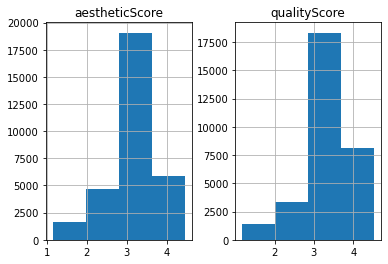

In [5]:
path_get2.hist(bins=4)

In [6]:
path_get2.describe()

,aestheticScore,qualityScore
count,31220.000000,31220.000000
mean,3.158553,3.327040
std,0.558106,0.560471
min,1.152174,1.170833
25%,2.900000,3.100000
50%,3.227273,3.422727
75%,3.541667,3.704348
max,4.458333,4.533333


array([[<AxesSubplot:title={'center':'aestheticScore'}>,
        <AxesSubplot:title={'center':'qualityScore'}>]], dtype=object)

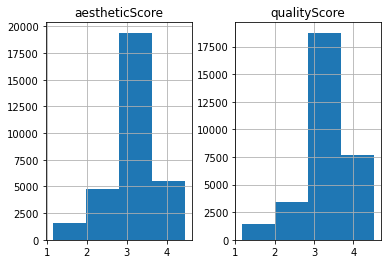

In [7]:
path_get3.hist(bins=4)

In [8]:
path_get3.describe()

,aestheticScore,qualityScore
count,31220.000000,31220.000000
mean,3.145592,3.312968
std,0.551070,0.553454
min,1.152174,1.168000
25%,2.895833,3.092000
50%,3.217391,3.410620
75%,3.520000,3.685185
max,4.458333,4.533333


## Get train_test dataset for Outliers >= 2 

In [9]:
minimum = np.amin(path_get2['aestheticScore'])
print(f'minimum value: {minimum:.4f}')

maximum = np.amax(path_get2['aestheticScore'])
print(f'maximum value: {maximum:.4f}')

minimum value: 1.1522
maximum value: 4.4583


In [10]:
from verstack.stratified_continuous_split import scsplit

X = path_get2['imageName']
y = path_get2['aestheticScore']

train, test = scsplit(path_get2, test_size=0.3, stratify=y, random_state=1234)
train

,imageName,aestheticScore,qualityScore
2461,iaa_pub12216_.jpg,2.980769,3.134615
29009,iaa_pub8010_.jpg,2.812500,3.095833
13377,iaa_pub22040_.jpg,2.900000,3.044000
29221,iaa_pub8201_.jpg,3.083333,3.375000
7794,iaa_pub17016_.jpg,3.460000,3.704000
...,...,...,...
25484,iaa_pub4839_.jpg,3.125000,3.255000
27792,iaa_pub6916_.jpg,2.900000,3.064000
30251,iaa_pub9129_.jpg,2.860000,3.236000
4277,iaa_pub13851_.jpg,2.420000,2.544000


array([[<AxesSubplot:title={'center':'aestheticScore'}>,
        <AxesSubplot:title={'center':'qualityScore'}>]], dtype=object)

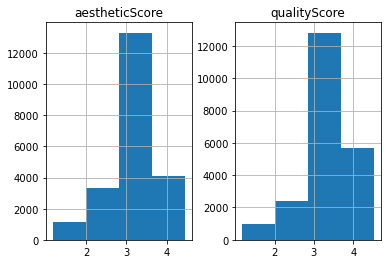

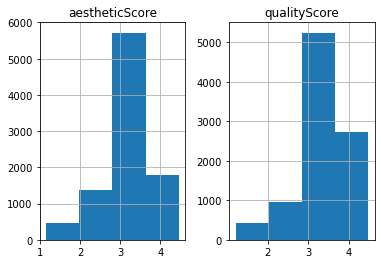

In [12]:
train.hist(bins=4)
test.hist(bins=4)

In [13]:
print(f'Training set size = {train.shape[0]}')
print(f'Test set size = {test.shape[0]}')
print(f'train/test ratio split: {test.shape[0]/train.shape[0]}')

Training set size = 21854
Test set size = 9366
train/test ratio split: 0.42857142857142855


In [14]:
train.reset_index(drop=True, inplace=True)
train

,imageName,aestheticScore,qualityScore
0,iaa_pub12216_.jpg,2.980769,3.134615
1,iaa_pub8010_.jpg,2.812500,3.095833
2,iaa_pub22040_.jpg,2.900000,3.044000
3,iaa_pub8201_.jpg,3.083333,3.375000
4,iaa_pub17016_.jpg,3.460000,3.704000
...,...,...,...
21849,iaa_pub4839_.jpg,3.125000,3.255000
21850,iaa_pub6916_.jpg,2.900000,3.064000
21851,iaa_pub9129_.jpg,2.860000,3.236000
21852,iaa_pub13851_.jpg,2.420000,2.544000


In [15]:
test.reset_index(drop=True, inplace=True)
test

,imageName,aestheticScore,qualityScore
0,iaa_pub17710_.jpg,3.312500,3.525000
1,iaa_pub12403_.jpg,2.875000,3.012500
2,iaa_pub20673_.jpg,3.454545,3.613636
3,iaa_pub25495_.jpg,3.023810,3.404762
4,iaa_pub5200_.jpg,2.958333,3.179167
...,...,...,...
9361,iaa_pub258_.jpg,3.230769,3.415385
9362,iaa_pub22284_.jpg,2.580000,2.692000
9363,iaa_pub17277_.jpg,3.666667,3.887500
9364,iaa_pub23733_.jpg,3.479167,3.504167


In [16]:
# get training dataset with sessionId
para_images = pd.read_csv('PARA_001/annotation/PARA-Images.csv')
para_images = para_images[['sessionId', 'imageName']]

merged_train = pd.merge(para_images, train, on='imageName')

merged_train = merged_train.drop_duplicates(subset=["imageName"], keep='first')

merged_train.reset_index(drop=True, inplace=True)


In [19]:
merged_train['sessionId_imageName'] = merged_train['sessionId'] + '_' + merged_train['imageName']
merged_train['set'] = 'training'
merged_train

,sessionId,imageName,aestheticScore,qualityScore,sessionId_imageName,set
0,session1,iaa_pub1_.jpg,3.809524,3.923810,session1_iaa_pub1_.jpg,training
1,session1,iaa_pub2_.jpg,3.142857,3.385714,session1_iaa_pub2_.jpg,training
2,session1,iaa_pub3_.jpg,2.928571,3.128571,session1_iaa_pub3_.jpg,training
3,session1,iaa_pub4_.jpg,3.428571,3.752381,session1_iaa_pub4_.jpg,training
4,session1,iaa_pub5_.jpg,3.214286,3.538095,session1_iaa_pub5_.jpg,training
...,...,...,...,...,...,...
21849,session99,iaa_pub6923_.jpg,3.000000,3.304000,session99_iaa_pub6923_.jpg,training
21850,session99,iaa_pub6924_.jpg,2.760000,2.980000,session99_iaa_pub6924_.jpg,training
21851,session99,iaa_pub6926_.jpg,3.180000,3.516000,session99_iaa_pub6926_.jpg,training
21852,session99,iaa_pub6927_.jpg,3.660000,3.768000,session99_iaa_pub6927_.jpg,training


In [21]:
# get testing dataset with sessionId
para_images = pd.read_csv('PARA_001/annotation/PARA-Images.csv')
para_images = para_images[['sessionId', 'imageName']]

merged_test = pd.merge(para_images, test, on='imageName')

merged_test = merged_test.drop_duplicates(subset=["imageName"], keep='first')

merged_test.reset_index(drop=True, inplace=True)
merged_test

,sessionId,imageName,aestheticScore,qualityScore
0,session1,iaa_pub6_.jpg,3.690476,3.890476
1,session1,iaa_pub7_.jpg,3.904762,4.052381
2,session1,iaa_pub13_.jpg,1.523810,1.638095
3,session1,iaa_pub16_.jpg,2.904762,3.157143
4,session1,iaa_pub18_.jpg,3.452381,3.604762
...,...,...,...,...
9361,session99,iaa_pub6921_.jpg,2.900000,3.116000
9362,session99,iaa_pub6922_.jpg,2.660000,2.876000
9363,session99,iaa_pub6925_.jpg,3.180000,3.396000
9364,session99,iaa_pub6928_.jpg,2.880000,3.052000


In [23]:
merged_test['sessionId_imageName'] = merged_test['sessionId'] + '_' + merged_test['imageName']

# create validation and test set
merged_validation, merged_test = scsplit(merged_test, test_size=0.5, stratify=y, random_state=1234)

In [27]:
merged_validation.reset_index(drop=True, inplace=True)
merged_test.reset_index(drop=True, inplace=True)

merged_train['set'] = 'training'
merged_validation['set'] = 'validation'
merged_test['set'] = 'test'

In [32]:
merged_validation
merged_test

,sessionId,imageName,aestheticScore,qualityScore,sessionId_imageName,set
0,session1,iaa_pub1_.jpg,3.809524,3.923810,session1_iaa_pub1_.jpg,training
1,session1,iaa_pub2_.jpg,3.142857,3.385714,session1_iaa_pub2_.jpg,training
2,session1,iaa_pub3_.jpg,2.928571,3.128571,session1_iaa_pub3_.jpg,training
3,session1,iaa_pub4_.jpg,3.428571,3.752381,session1_iaa_pub4_.jpg,training
4,session1,iaa_pub5_.jpg,3.214286,3.538095,session1_iaa_pub5_.jpg,training
...,...,...,...,...,...,...
21849,session99,iaa_pub6923_.jpg,3.000000,3.304000,session99_iaa_pub6923_.jpg,training
21850,session99,iaa_pub6924_.jpg,2.760000,2.980000,session99_iaa_pub6924_.jpg,training
21851,session99,iaa_pub6926_.jpg,3.180000,3.516000,session99_iaa_pub6926_.jpg,training
21852,session99,iaa_pub6927_.jpg,3.660000,3.768000,session99_iaa_pub6927_.jpg,training


In [37]:
merged_get2 = pd.concat([merged_train, merged_test, merged_validation], ignore_index=True)
merged_get2

,sessionId,imageName,aestheticScore,qualityScore,sessionId_imageName,set
0,session1,iaa_pub1_.jpg,3.809524,3.923810,session1_iaa_pub1_.jpg,training
1,session1,iaa_pub2_.jpg,3.142857,3.385714,session1_iaa_pub2_.jpg,training
2,session1,iaa_pub3_.jpg,2.928571,3.128571,session1_iaa_pub3_.jpg,training
3,session1,iaa_pub4_.jpg,3.428571,3.752381,session1_iaa_pub4_.jpg,training
4,session1,iaa_pub5_.jpg,3.214286,3.538095,session1_iaa_pub5_.jpg,training
...,...,...,...,...,...,...
31215,session340,iaa_pub23744_.jpg,3.500000,3.608333,session340_iaa_pub23744_.jpg,validation
31216,session137,iaa_pub9552_.jpg,3.425000,3.720000,session137_iaa_pub9552_.jpg,validation
31217,session256,iaa_pub17866_.jpg,3.023810,3.233333,session256_iaa_pub17866_.jpg,validation
31218,session134,iaa_pub9349_.jpg,4.022727,4.154545,session134_iaa_pub9349_.jpg,validation


In [38]:
# Uncomment to produce train-test-split
# merged_get2.to_csv('PARA_MTAIQ_GET2_official_dataset.csv', index=False)

## Get train_test dataset for Outliers >= 3

aestheticScore minimum value: 1.1522
aestheticScore maximum value: 4.4583
qualityScore minimum value: 1.1680
qualityScore maximum value: 4.5333
Training set size = 21854
Test set size = 9366
train/test ratio split: 0.42857142857142855


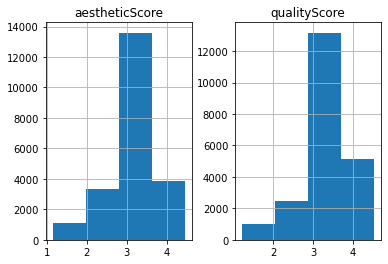

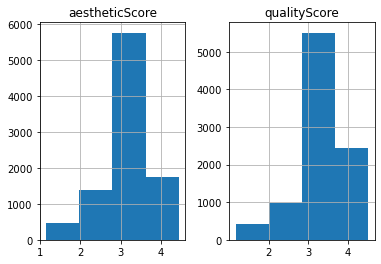

In [39]:
minimum = np.amin(path_get3['aestheticScore'])
print(f'aestheticScore minimum value: {minimum:.4f}')

maximum = np.amax(path_get3['aestheticScore'])
print(f'aestheticScore maximum value: {maximum:.4f}')

minimum = np.amin(path_get3['qualityScore'])
print(f'qualityScore minimum value: {minimum:.4f}')

maximum = np.amax(path_get3['qualityScore'])
print(f'qualityScore maximum value: {maximum:.4f}')


# train_test_split
X = path_get3['imageName']
y = path_get3['aestheticScore']

train, test = scsplit(path_get3, test_size=0.3, stratify=y, random_state=1234)
train.hist(bins=4)
test.hist(bins=4)

print(f'Training set size = {train.shape[0]}')
print(f'Test set size = {test.shape[0]}')
print(f'train/test ratio split: {test.shape[0]/train.shape[0]}')

In [40]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [41]:
# get training dataset with sessionId
para_images = pd.read_csv('PARA_001/annotation/PARA-Images.csv')
para_images = para_images[['sessionId', 'imageName']]

merged_train = pd.merge(para_images, train, on='imageName')

merged_train = merged_train.drop_duplicates(subset=["imageName"], keep='first')

merged_train.reset_index(drop=True, inplace=True)
merged_train

,sessionId,imageName,aestheticScore,qualityScore
0,session1,iaa_pub2_.jpg,3.104167,3.341667
1,session1,iaa_pub5_.jpg,3.187500,3.491667
2,session1,iaa_pub6_.jpg,3.562500,3.866667
3,session1,iaa_pub9_.jpg,2.625000,2.904167
4,session1,iaa_pub10_.jpg,2.895833,3.158333
...,...,...,...,...
21849,session99,iaa_pub6924_.jpg,2.732143,2.960714
21850,session99,iaa_pub6926_.jpg,3.142857,3.492857
21851,session99,iaa_pub6927_.jpg,3.571429,3.710714
21852,session99,iaa_pub6929_.jpg,2.946429,3.178571


In [42]:
merged_train['sessionId_imageName'] = merged_train['sessionId'] + '_' + merged_train['imageName']
merged_train['set'] = 'training'
merged_train

,sessionId,imageName,aestheticScore,qualityScore,sessionId_imageName,set
0,session1,iaa_pub2_.jpg,3.104167,3.341667,session1_iaa_pub2_.jpg,training
1,session1,iaa_pub5_.jpg,3.187500,3.491667,session1_iaa_pub5_.jpg,training
2,session1,iaa_pub6_.jpg,3.562500,3.866667,session1_iaa_pub6_.jpg,training
3,session1,iaa_pub9_.jpg,2.625000,2.904167,session1_iaa_pub9_.jpg,training
4,session1,iaa_pub10_.jpg,2.895833,3.158333,session1_iaa_pub10_.jpg,training
...,...,...,...,...,...,...
21849,session99,iaa_pub6924_.jpg,2.732143,2.960714,session99_iaa_pub6924_.jpg,training
21850,session99,iaa_pub6926_.jpg,3.142857,3.492857,session99_iaa_pub6926_.jpg,training
21851,session99,iaa_pub6927_.jpg,3.571429,3.710714,session99_iaa_pub6927_.jpg,training
21852,session99,iaa_pub6929_.jpg,2.946429,3.178571,session99_iaa_pub6929_.jpg,training


In [43]:
# get testing dataset with sessionId
para_images = pd.read_csv('PARA_001/annotation/PARA-Images.csv')
para_images = para_images[['sessionId', 'imageName']]

merged_test = pd.merge(para_images, test, on='imageName')

merged_test = merged_test.drop_duplicates(subset=["imageName"], keep='first')

merged_test.reset_index(drop=True, inplace=True)

merged_test['sessionId_imageName'] = merged_test['sessionId'] + '_' + merged_test['imageName']

# create validation and test set
merged_validation, merged_test = scsplit(merged_test, test_size=0.5, stratify=y, random_state=1234)

In [45]:
merged_validation.reset_index(drop=True, inplace=True)
merged_test.reset_index(drop=True, inplace=True)

merged_validation['set'] = 'validation'
merged_test['set'] = 'test'

In [49]:
# merged_train
# merged_validation
# merged_test

merged_get3 = pd.concat([merged_train, merged_test, merged_validation], ignore_index=True)
merged_get3

,sessionId,imageName,aestheticScore,qualityScore,sessionId_imageName,set
0,session1,iaa_pub2_.jpg,3.104167,3.341667,session1_iaa_pub2_.jpg,training
1,session1,iaa_pub5_.jpg,3.187500,3.491667,session1_iaa_pub5_.jpg,training
2,session1,iaa_pub6_.jpg,3.562500,3.866667,session1_iaa_pub6_.jpg,training
3,session1,iaa_pub9_.jpg,2.625000,2.904167,session1_iaa_pub9_.jpg,training
4,session1,iaa_pub10_.jpg,2.895833,3.158333,session1_iaa_pub10_.jpg,training
...,...,...,...,...,...,...
31215,session5,iaa_pub296_.jpg,3.840000,3.952000,session5_iaa_pub296_.jpg,validation
31216,session14,iaa_pub922_.jpg,4.152174,4.226087,session14_iaa_pub922_.jpg,validation
31217,session331,iaa_pub23123_.jpg,3.820000,3.848000,session331_iaa_pub23123_.jpg,validation
31218,session225,iaa_pub15749_.jpg,3.041667,3.150000,session225_iaa_pub15749_.jpg,validation


In [50]:
merged_get3.to_csv('PARA_MTAIQ_GET3_official_dataset.csv', index=False)

# PARA All image mean scores with all users

In [7]:
path_all_image_mean = pd.read_csv("PARA_images_all_image_mean_score.csv")

In [8]:
path_all_image_mean

,sessionId,imageName,aestheticScore,qualityScore
0,session1,iaa_pub1_.jpg,3.750000,3.866667
1,session1,iaa_pub2_.jpg,3.104167,3.341667
2,session1,iaa_pub3_.jpg,2.916667,3.104167
3,session1,iaa_pub4_.jpg,3.416667,3.716667
4,session1,iaa_pub5_.jpg,3.187500,3.491667
...,...,...,...,...
31215,session99,iaa_pub6926_.jpg,3.155172,3.500000
31216,session99,iaa_pub6927_.jpg,3.603448,3.734483
31217,session99,iaa_pub6928_.jpg,2.793103,2.979310
31218,session99,iaa_pub6929_.jpg,2.965517,3.186207


aestheticScore minimum value: 1.1600
aestheticScore maximum value: 4.4200
qualityScore minimum value: 1.1680
qualityScore maximum value: 4.5080
Training set size = 21854
Test set size = 9366
train/test ratio split: 0.42857142857142855


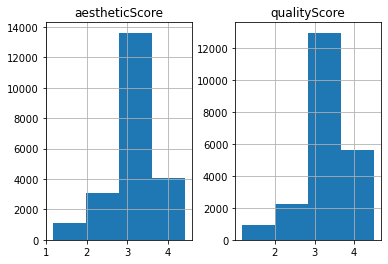

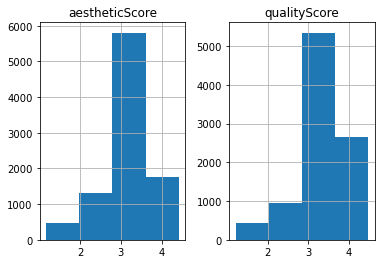

In [9]:
minimum = np.amin(path_all_image_mean['aestheticScore'])
print(f'aestheticScore minimum value: {minimum:.4f}')

maximum = np.amax(path_all_image_mean['aestheticScore'])
print(f'aestheticScore maximum value: {maximum:.4f}')

minimum = np.amin(path_all_image_mean['qualityScore'])
print(f'qualityScore minimum value: {minimum:.4f}')

maximum = np.amax(path_all_image_mean['qualityScore'])
print(f'qualityScore maximum value: {maximum:.4f}')


# train_test_split
X = path_all_image_mean['imageName']
y = path_all_image_mean['aestheticScore']

train, test = scsplit(path_all_image_mean, test_size=0.3, stratify=y, random_state=1234)
train.hist(bins=4)
test.hist(bins=4)

print(f'Training set size = {train.shape[0]}')
print(f'Test set size = {test.shape[0]}')
print(f'train/test ratio split: {test.shape[0]/train.shape[0]}')

In [10]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [13]:
train['sessionId_imageName'] = train['sessionId'] + '_' + train['imageName']
train['set'] = 'training'
train

,sessionId,imageName,aestheticScore,qualityScore,sessionId_imageName,set
0,session328,iaa_pub22893_.jpg,1.980000,2.084000,session328_iaa_pub22893_.jpg,training
1,session232,iaa_pub16180_.jpg,3.720000,3.840000,session232_iaa_pub16180_.jpg,training
2,session125,iaa_pub8721_.jpg,2.900000,3.052000,session125_iaa_pub8721_.jpg,training
3,session139,iaa_pub9725_.jpg,3.120000,3.356000,session139_iaa_pub9725_.jpg,training
4,session79,iaa_pub5474_.jpg,3.840000,3.932000,session79_iaa_pub5474_.jpg,training
...,...,...,...,...,...,...
21849,session287,iaa_pub20056_.jpg,3.057692,3.323077,session287_iaa_pub20056_.jpg,training
21850,session87,iaa_pub6042_.jpg,3.600000,3.788000,session87_iaa_pub6042_.jpg,training
21851,session122,iaa_pub8509_.jpg,2.711538,3.019231,session122_iaa_pub8509_.jpg,training
21852,session262,iaa_pub18281_.jpg,3.160000,3.308000,session262_iaa_pub18281_.jpg,training


In [14]:
test['sessionId_imageName'] = test['sessionId'] + '_' + test['imageName']

# create validation and test set
validation, test = scsplit(test, test_size=0.5, stratify=y, random_state=1234)

validation.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

validation['set'] = 'validation'
test['set'] = 'test'

In [16]:
test

,sessionId,imageName,aestheticScore,qualityScore,sessionId_imageName,set
0,session46,iaa_pub3212_.jpg,3.596154,3.673077,session46_iaa_pub3212_.jpg,test
1,session428,iaa_pub29948_.jpg,2.900000,3.008000,session428_iaa_pub29948_.jpg,test
2,session108,iaa_pub7516_.jpg,2.360000,2.496000,session108_iaa_pub7516_.jpg,test
3,session23,iaa_pub1608_.jpg,3.940000,4.040000,session23_iaa_pub1608_.jpg,test
4,session154,iaa_pub10739_.jpg,3.220000,3.412000,session154_iaa_pub10739_.jpg,test
...,...,...,...,...,...,...
4678,session161,iaa_pub11260_.jpg,2.568966,2.806897,session161_iaa_pub11260_.jpg,test
4679,session188,iaa_pub13123_.jpg,3.055556,3.181481,session188_iaa_pub13123_.jpg,test
4680,session438,iaa_pub30652_.jpg,2.846154,3.134615,session438_iaa_pub30652_.jpg,test
4681,session313,iaa_pub21897_.jpg,3.340000,3.424000,session313_iaa_pub21897_.jpg,test


In [20]:
# train
# validation
# test

merged = pd.concat([train, test, validation], ignore_index=True)
merged

,sessionId,imageName,aestheticScore,qualityScore,sessionId_imageName,set
0,session328,iaa_pub22893_.jpg,1.980000,2.084000,session328_iaa_pub22893_.jpg,training
1,session232,iaa_pub16180_.jpg,3.720000,3.840000,session232_iaa_pub16180_.jpg,training
2,session125,iaa_pub8721_.jpg,2.900000,3.052000,session125_iaa_pub8721_.jpg,training
3,session139,iaa_pub9725_.jpg,3.120000,3.356000,session139_iaa_pub9725_.jpg,training
4,session79,iaa_pub5474_.jpg,3.840000,3.932000,session79_iaa_pub5474_.jpg,training
...,...,...,...,...,...,...
31215,session7,iaa_pub484_.jpg,3.540000,3.664000,session7_iaa_pub484_.jpg,validation
31216,session68,iaa_pub4700_.jpg,2.640000,2.984000,session68_iaa_pub4700_.jpg,validation
31217,session20,iaa_pub1377_.jpg,3.340000,3.428000,session20_iaa_pub1377_.jpg,validation
31218,session64,iaa_pub4477_.jpg,3.464286,3.607143,session64_iaa_pub4477_.jpg,validation


In [21]:
merged.to_csv('PARA_MTAIQ_All_User_official_dataset.csv', index=False)